In [1]:
import pandas as pd
import pickle
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [2]:
base = pd.read_csv('../data/enem_newFeatures.csv')
base.head()

,TP_FAIXA_ETARIA,TP_ESCOLA,RENDA_FAM,COMPUTADOR,INTERNET,NOTA
0,3,2,1,1,1,média
1,2,2,2,1,1,média
2,8,2,1,0,1,baixa
3,4,2,1,0,1,baixa
4,2,2,1,1,1,média


In [3]:
X = base.iloc[:,0:5].values
y = base.iloc[:,5].values

<AxesSubplot:ylabel='count'>

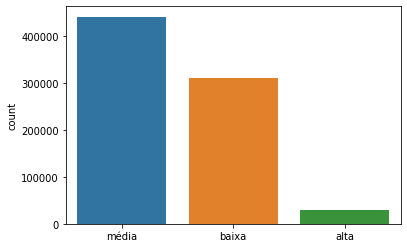

In [4]:
sns.countplot(x = y, data = base)

In [5]:
#Balanceando a classe com NearMiss
nearMiss = NearMiss()
X_underSample, y_underSample = nearMiss.fit_resample(X, y)

<AxesSubplot:ylabel='count'>

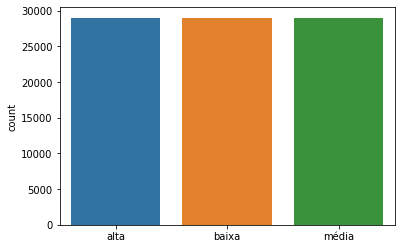

In [6]:
sns.countplot(x = y_underSample, data = base)

In [7]:
print(Counter(y))
print(Counter(y_underSample))

Counter({'média': 440332, 'baixa': 310848, 'alta': 29026})
Counter({'alta': 29026, 'baixa': 29026, 'média': 29026})


In [8]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_underSample,
                                                        y_underSample,
                                                        test_size = 0.2,
                                                        random_state = 0)

In [9]:
underSample_modelo = RandomForestClassifier(n_estimators = 1000, random_state = 0, n_jobs = -1)
underSample_modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [10]:
predict = underSample_modelo.predict(X_teste)

In [11]:
evaluation = accuracy_score(y_teste, predict)
evaluation

0.6386655948553055

In [12]:
confusion = confusion_matrix(y_teste, predict)
confusion

array([[4712,  217,  800],
       [ 216, 4255, 1385],
       [1165, 2510, 2156]], dtype=int64)

In [13]:
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

        alta       0.77      0.82      0.80      5729
       baixa       0.61      0.73      0.66      5856
       média       0.50      0.37      0.42      5831

    accuracy                           0.64     17416
   macro avg       0.63      0.64      0.63     17416
weighted avg       0.63      0.64      0.63     17416



In [14]:
underSample_modelo.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}